### <p style="text-align: right;"> &#9989; Andrew Koren</p>

# PHY480 Day 3

## In-class assignment: Numerical differentiation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Consider the following univariate function:

$$
f(x) = \sin(x^2).
$$


In [3]:

def fun( x ):
    '''
    function sin(x^2)
    Input:
    x
    Output
    f(x) = sin(x^2)
    '''

    return np.sin( x*x )


**Task 1.** Calculate analytically the derivative $f'(x)$. Complete the following function that returns the value of the derivative. Check that you programmed the derivative correctly by printing $f'(x)$ at several points and comparing to e.g. calculator.

In [4]:
# derivative of the function sin(x^2)
# Input:
# x
# Output
# f'(x)
def d_fun( x ):
    return 2*x*np.cos(x**2)


**Task 2.** Program the three schemes for the first derivative: forward, backward and central. You provide the function to be derived as input (i.e. the functions to be coded are general, they can accept any function to calculate the derivative). To check correctness, calculate the derivatives for the `fun` function given above and compare against the analytic derivative with `d_fun` function you coded earlier.

In [9]:
# forward finite difference
# Input:
# fun -- function to be derived
# x -- at which point
# eps -- step size for approximations
def df_forward( fun, x, eps=0.001 ):
    return (fun(x+eps)-fun(x))/eps

# backward finite difference
# Input:
# fun -- function to be derived
# x -- at which point
# eps -- step size for approximations
def df_backward( fun, x, eps=0.001 ):
    return (fun(x)-fun(x-eps))/eps

# central finite difference
# Input:
# fun -- function to be derived
# x -- at which point
# eps -- step size for approximations
def df_central( fun, x, eps=0.001 ):
    return (fun(x+eps/2) - fun(x-eps/2))/eps

print(
d_fun(1.5), '\n',
df_forward(fun, 1.5),'\n',
df_backward(fun, 1.5),'\n',
df_central(fun, 1.5)
)

-1.8845208681682175 
 -1.8886498735481982 
 -1.8803908776581224 
 -1.8845207450273183


**Task 3.** For a list of step sizes `eps` given below do the following. At fixed value $x_0=1$ calculate the difference in derivative between the approximate scheme and the (exact) analytic expression for $f(x)=\sin(x^2)$. Plot that difference as function of `eps` for the forward, backward and central difference on the log-log scale on the same plot. Explain the resulting plot and if it matches your expectations.

1.0806046117362795


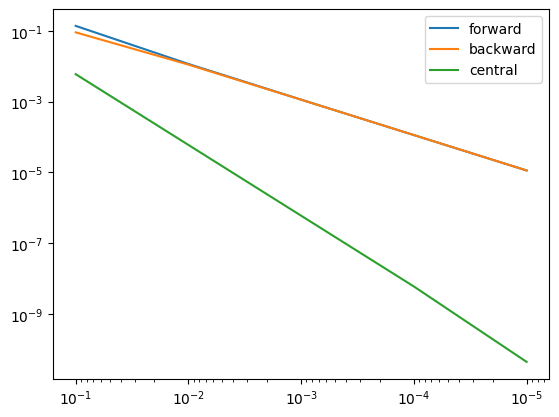

In [27]:
import matplotlib.pyplot as plt

eps_list = np.array([10**(-i) for i in range(1,6) ])
actual = d_fun(1)


fwd_approx = df_forward(fun, 1, eps=eps_list) - actual
bwd_approx = df_backward(fun, 1, eps=eps_list) - actual
central_approx = df_central(fun, 1, eps=eps_list) - actual

plt.plot(eps_list, abs(fwd_approx), label='forward')
plt.plot(eps_list, abs(bwd_approx), label='backward')
plt.plot(eps_list, abs(central_approx), label='central')

plt.xscale('log')
plt.yscale('log')
plt.legend()

# invert direction for dramatic effect
a, b = plt.xlim()
plt.xlim(b, a)
print(actual)

The central approximation has a better result than the other two, which makes sense since it gathers data from both sides of the point and is effectively using eps/2 and double-correcting. 

**Task 4.** Study the documentation of the `autograd` package. Write code below to evaluate the derivaitve of $f(x)=\sin(x^2)$ with `autograd`. Compute the derivative at $x=1,2,3$ and compare the result to your analytic calculation.

A detailed discussion of autodifferentiation can be found in Alex Gezerlis, Numerical Methods in Physics with Python.

In [55]:
import autograd.numpy as np
import autograd as ad

def fun(x):
    return np.sin(x*x)

f_grad = ad.grad(fun)

xvals = np.array([1, 2, 3], dtype='float')
[f_grad(x) for x in xvals] - d_fun(xvals)

array([0., 0., 0.])

&#169; Copyright 2025,  Michigan State University Board of Trustees